<a href="https://colab.research.google.com/github/westlfower/pythone/blob/main/1216%EB%B0%A9%EA%B3%BC%ED%9B%84_0%EA%B0%95_%ED%94%BC%EB%B2%97_%EB%B0%8F_%ED%81%AC%EB%A1%9C%EC%8A%A4%ED%83%AD_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import random

data={'이름':[f'학생{i+1}' for i in range(20)]
      ,'반':[random.choice(['1반','2반','3반']) for _ in range(20)]
      ,'과목':[random.choice(['수학','과학','영어']) for _ in range(20)]
      ,'점수':[random.randint(40,101) for _ in range(20)]}

In [5]:
import pandas as pd
df=pd.DataFrame(data)

In [6]:
df.head()

,이름,반,과목,점수
0,학생1,3반,수학,52
1,학생2,2반,영어,75
2,학생3,3반,영어,76
3,학생4,2반,영어,62
4,학생5,3반,영어,100


In [8]:
#pd.pivot_table(data,index=,columns=,values=.aggfunc='mean','sum','count')
df2=pd.pivot_table(df, index='반',columns='과목',values='점수',aggfunc='sum')

In [9]:
df2.head()# 도수 분포다각형 그려보기

과목,과학,수학,영어
반,,,
1반,129,156,104
2반,150,216,208
3반,134,52,217


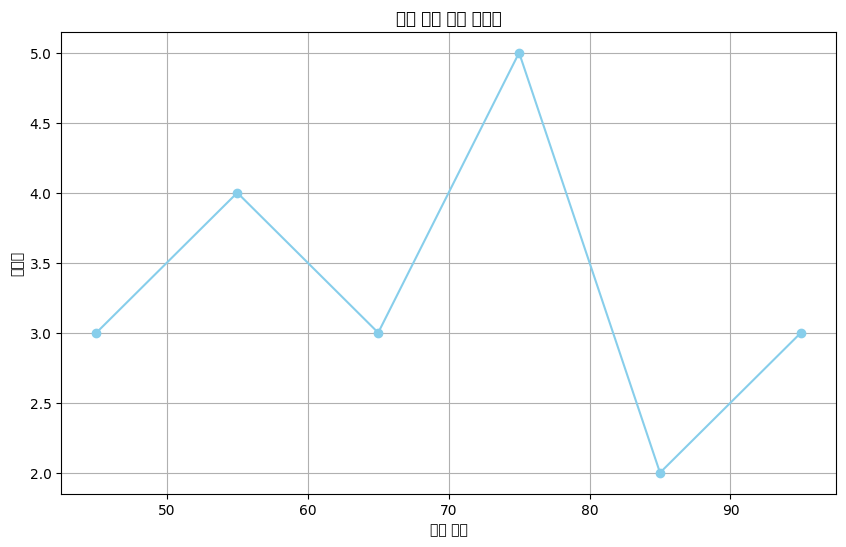

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

# '점수' (score) column에서 최소값과 최대값을 가져옵니다.
min_score = df['점수'].min()
max_score = df['점수'].max()

# 계급 구간 (bins)을 정의합니다. 예를 들어, 10점 단위로 나눕니다.
bins = np.arange(min_score - (min_score % 10), max_score + 10, 10)

# 히스토그램을 계산하여 각 계급 구간의 빈도수를 얻습니다.
# density=False로 설정하여 빈도수를 그대로 사용합니다.
counts, bin_edges = np.histogram(df['점수'], bins=bins)

# 도수 분포 다각형의 x축 좌표 (계급값, 즉 계급 구간의 중간값)를 계산합니다.
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# 도수 분포 다각형을 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', color='skyblue')

# x축과 y축의 라벨을 설정합니다.
plt.xlabel('점수 구간')
plt.ylabel('빈도수')

# 그래프의 제목을 설정합니다.
plt.title('점수 도수 분포 다각형')

# 그리드를 추가하여 가독성을 높입니다.
plt.grid(True)

# 그래프를 표시합니다.
plt.show()

이 코드는 `matplotlib` 라이브러리를 사용하여 `df` 데이터프레임의 '점수' 컬럼에 대한 도수 분포 다각형을 생성합니다. 주요 단계는 다음과 같습니다:

1. **`min_score`와 `max_score` 계산**: '점수' 컬럼의 최소값과 최대값을 얻습니다.
2. **`bins` 정의**: `np.arange`를 사용하여 점수 범위를 10점 단위로 나누는 계급 구간(bins)을 생성합니다. 시작점과 끝점을 조정하여 모든 데이터가 포함되도록 합니다.
3. **`np.histogram`으로 빈도수 계산**: `df['점수']` 데이터를 정의된 `bins`에 따라 히스토그램으로 계산합니다. `counts`는 각 계급 구간의 빈도수이고, `bin_edges`는 계급 구간의 경계값입니다.
4. **`bin_midpoints` 계산**: 도수 분포 다각형의 x축 좌표가 될 각 계급 구간의 중간값(계급값)을 계산합니다.
5. **`plt.plot`으로 다각형 그리기**: `bin_midpoints`를 x축으로, `counts`를 y축으로 하여 선 그래프를 그립니다. `marker='o'`는 각 계급값에 점을 표시하고, `linestyle='-'`는 점들을 연결하는 선을 그립니다.
6. **그래프 설정**: x축, y축 라벨, 제목을 설정하고 `plt.grid(True)`로 그리드를 추가하여 그래프의 가독성을 높입니다.

이 다각형은 '점수' 컬럼의 데이터 분포를 시각적으로 보여주어, 어떤 점수대에 학생 수가 많은지 한눈에 파악할 수 있게 해줍니다.